# Data extracted directly from Yahoo using Pandas-datareader
This isn't a robust financial analysis or shoul not be taken as financial advice
This project focusses on Bank Stocks and analyses their progress throughout the financial crises all the way to early 2016 starting from 1st January, 2006

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\users\mishita\appdata\local\programs\python\python37-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

In [4]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [5]:
init_notebook_mode(connected = True)

In [6]:
cf.go_offline()

## DATA

We need to get data using pandas-datareader from the Yahoo website. We get the stock information for the following banks and their ticker symbols:
                                 
  - Bank of America                -   'BAC'
  - Citigroup                      -   'C'
  - Goldman Sachs                  -   'GS'      
  - JPMorgan Chase                 -   'JPM'
  - Morgan Stanley                 -   'MS'
  - Wells Fargo                    -   'WFC'

In [7]:
start = parser.parse('2006-01-01')
end = parser.parse('2016-01-01')

In [8]:
BAC = data.DataReader('BAC','yahoo',start,end)

In [9]:
C = data.DataReader('C','yahoo',start,end)

In [10]:
GS = data.DataReader('GS','yahoo',start,end)

In [11]:
JPM = data.DataReader('JPM','yahoo',start,end)

In [12]:
MS = data.DataReader('MS','yahoo',start,end)

In [13]:
WFC = data.DataReader('WFC','yahoo',start,end)

In [14]:
WFC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


#### Concatenating the above 5 data frames along their columns

In [15]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [16]:
# list of DataFrames to be concatenated
df_list = [BAC,C,GS,JPM,MS,WFC]
bank_stocks = pd.concat(df_list, axis=1, join='outer', ignore_index=False,
                        keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.758644  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.784546  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.888165  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.927017  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.328484  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.823185  
2006-01-04  31.530001  10870000.0  20.581659  
2006-01-05  31.495001  10158000.0  20.558811  
2006-01-06  31.680000   8403800.0  20.679575  
2006-01-09  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

In [17]:
bank_stocks.shape

(2517, 36)

In [18]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

## EDA
The documentation on Multi-Level Indexing and the usage of th function .xs() will be required

#### Create a New DataFrame containing the returns for each bank's stock using the formula given below on the Closing Price columns of each of the banks:

                   return at time t = (value of the stock at time t/ Value of the stock at time t-1) - 1

In [19]:
returns_df = pd.DataFrame()

In [20]:
for tick in tickers:
    returns_df[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns_df.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


It is very obvious why the first row has NaN values. This is because the first instance in the bank_stocks Data Frame being of 2006-01-03 there is no data point from 2nd Jan, 2006 to get the Bank Stock returns on 3rd Jan, 2006

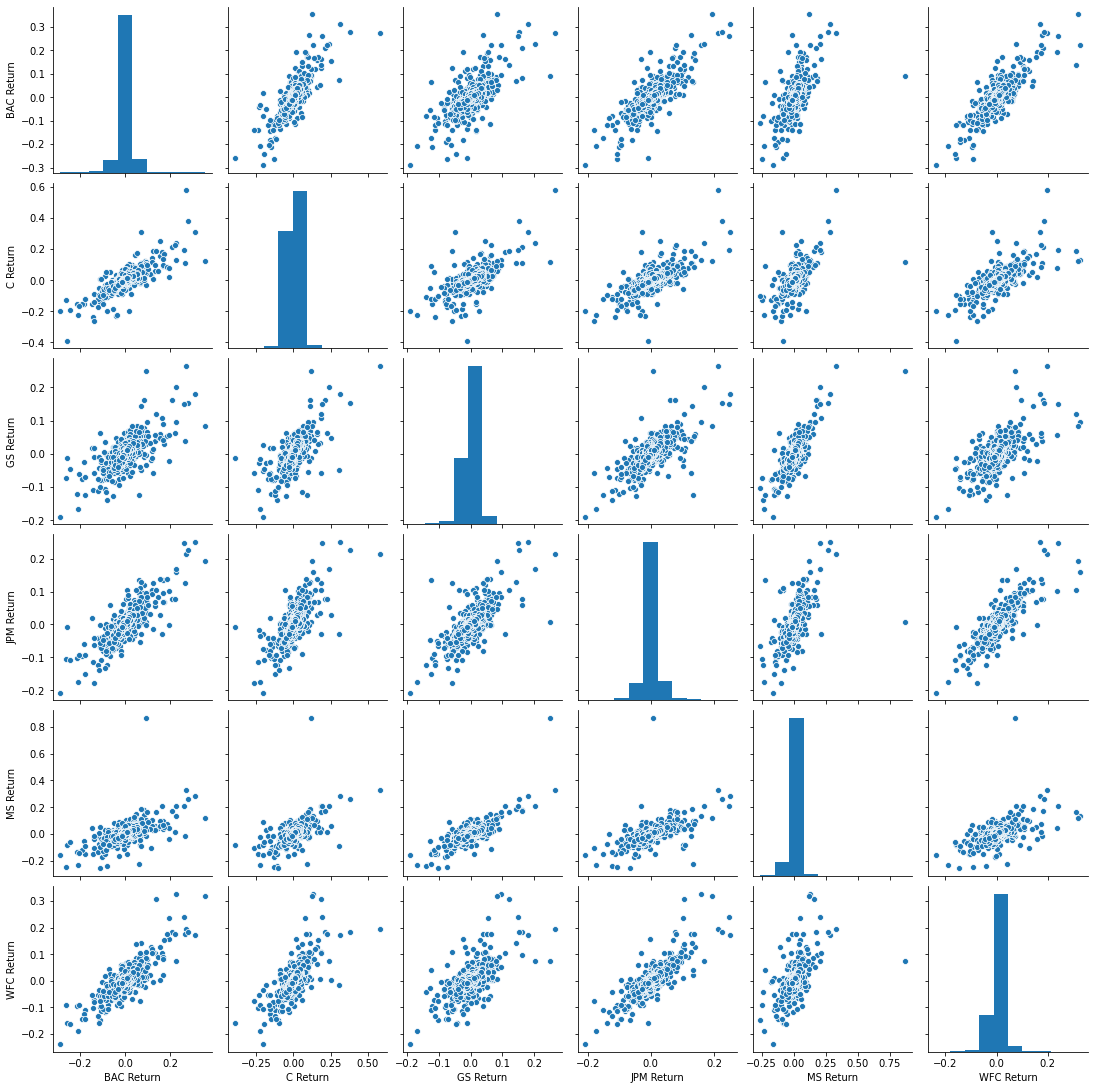

In [21]:
sns.pairplot(returns_df)

#### The max Closing price for each banks stock throughout the time period

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

#### Grabbing the DataFrame of the Closing Prices for all the 6 banks

In [24]:
bank_stocks_close = bank_stocks.xs(key='Close',axis=1,level='Stock Info')
bank_stocks_close

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


#### To figure out from the Returns DataFrame what dates each bank stock had the best and worst single day returns.

In [33]:
returns_df.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [34]:
returns_df.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

NOTE: 
 - 20th Jan, 2009 is the day when BAC, GS, JPM and WFC saw their lowest stock return rates

In [35]:
returns_df.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

NOTE: 
 - JPM has its highest returns on the day 21st Jan, 2009, which is the day following its largest drop in return rates
 - MS has its highest return rates on the third day after its lowest

#### Now we look at the standard deviations of the returns. Which stock is the riskiest over the entire time period?

In [36]:
returns_df.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Hence, the stocks of Citigroup were the riskiest to buy over the entire time period.

#### Which stock has the lowest returns and hence was the riskiest for the year 2015?

In [37]:
returns_df['2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Thus, for the year 2015, MS and the BAC were at the highest risk

#### Dist plot using seaborn of 2015 returns for Morgan Stanley

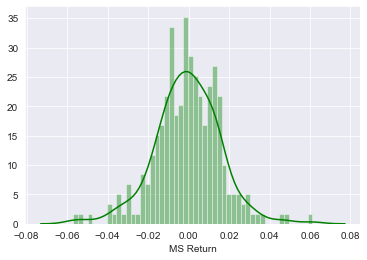

In [40]:
sns.set_style('darkgrid')
sns.distplot(returns_df['2015']['MS Return'],
             kde=True,bins=50,color='green')

In [78]:
returns_df['2015']['MS Return'].mean()

-0.0006561670073704938

Only deviate 0.06 from the average value 

#### Seaborn Dist plot for Citigroup for the year 2008

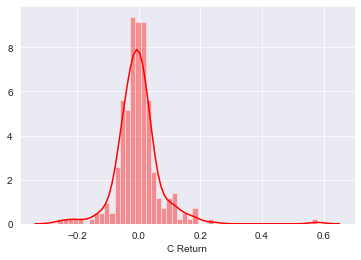

In [43]:
sns.set_style('darkgrid')
sns.distplot(returns_df['2008']['C Return'],
             kde=True,bins=50,color='red')

Observation:
 - The std dev of the returns of Citigroup in 2008 was almost 10 times that of the returns of Morgan Stanley in 2015
 
## More Visualizations
Create a line pot showing Closing Prices for each bank for the entire index of time.

#### Below we see the Interactive Time Series plots (using Plotly) for each of the banks 

In [92]:
g = bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

Observation:
- Thus, we observe that the Citi Group suffered a crash in its stock values beginning from the second half of the year 2007, and from the beginning of the year 2008 it just went on decreasing to eventually become a bit stable
- There has been a large variation in the closing prices for both Citi Group and Goldman Sachs
- Also the Closing Prices become more stable as the years passed for all the Banks
- Comparing the 6 curves from 01-01-2009 to 01-01-2016 we notice that Goldman Sachs has the Highest Closing Price but also it shows the most variation
- By analysing all the above plots we conclude that all these 6 banks suffered loses in the second half of 2007 and in 2008. This was due to the financial crisis of 2007–08, also known as the global financial crisis (GFC), which was a severe worldwide economic crisis.

## Moving Averages
For stocks in the year 2008
#### Plot the rolling 30 day average against the Close Price for Bank of America's stock for the year 2008